In [ ]:
# "Star Wars Classifier"
> "Buiding a star wars character classifier using fastai"

- badges: true
- comments: true
- author: Naman Manchanda
- categories: [fastpages, jupyter]

<h1><center>Star Wars Classifier</center></h1> <a id=100></a>



<div class="alert alert-warning">
<div>
    <span style="color:black">
This notebook consists of building a Star Wars classifier from scratch. The notebook doesn't use any predefined dataset. So, I'll be downloading the dataset on the go by scraping the images from internet. For the sake of keeping it simple, I'll be making a 3 class classifier mainly of Yoda, Luke and Wookie. The model development will be done using fastai. If you like the notebook, consider giving an upvote. ✅
    </span>
</div>
<br>
<center>
<img src = "https://media.giphy.com/media/2wGXK84nfEtR1JHe1H/giphy.gif" />
</center>
    
</div>

Table of Contents:
1. [Downloads](#1)
2. [Packages](#2)
3. [Pre-model building](#3)
    - 3.1 [Create folder](#4)
    - 3.2 [Scrape images](#5)
    - 3.3 [Move images](#6)
4. [Data Loaders](#7)
    - 4.1 [For a single label](#8)
    - 4.2 [For the model building](#9)
5. [Model Building](#10)
    - 5.1 [Training](#11)
    - 5.2 [Prediction](#12)

### 1. Downloads <a id=1></a>
[back to top](#100)

I'm using a python package named `icrawler` for scraping the images.

In [1]:
!pip install icrawler

     |████████████████████████████████| 115 kB 973 kB/s eta 0:00:01
  Created wheel for icrawler: filename=icrawler-0.6.4-py2.py3-none-any.whl size=35063 sha256=ee49e0f6ae08d4f09be3910a841849600317d73ef73da79f87eaaf8a1d94d250
  Stored in directory: /root/.cache/pip/wheels/34/9a/e6/a8bc00ac61ff1f0e613af0d181feaef49ed226915ee7ff19d1
Successfully built icrawler


### 2. Packages <a id=2></a>
[back to top](#100)

In [2]:
# basic libraris
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# icrawler 
from icrawler.builtin import GoogleImageCrawler   

# fastai
from fastai import *
from fastai.vision import *
from fastai.imports import *
from fastai.vision.all import *

# widgets
import ipywidgets as widgets

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 3. Pre-model building <a id=3></a>
[back to top](#100)

#### 3.1 Create folder <a id=4></a>

I'm creating three folders in `/kaggle/working` to download their respective image in each folder.

In [4]:
!mkdir yoda
!mkdir luke
!mkdir wookie

#### 3.2 Scrape images <a id=5></a>
The way `icrawler` works is that it creates a folder named `/images` from wherever the command is run. So right now we are in the `/kaggle/working` directory. Now I'll be going to each directory one at a time and run the crawler to download the images in the `/images` folder. So the structure of the folders will be something like
- `/kaggle/working/yoda/images`
- `/kaggle/working/luke/images`
- `/kaggle/working/wookie/images`

After the download, I'll be moving the images from the images folder of each respective label to the label folder itself - so for example from `/kaggle/working/yoda/images` to `/kaggle/working/yoda` and I'll be deleting all the empty images folder.

If you would like to reproduce the exact same thing, run the command in console first followed by the command in the notebook and so on in the provided order which is as follows.

*Run the following in console*
<div class="alert alert-danger">
  cd yoda
</div>

*After above command, run the following cell*

In [8]:
google_crawler = GoogleImageCrawler()
google_crawler.crawl(keyword='baby yoda', max_num=50)

*Run the following in console one line at a time*
<div class="alert alert-danger">
  cd ..<br>
  cd luke
</div>

*After above command, run the following cell*

In [11]:
google_crawler = GoogleImageCrawler()
google_crawler.crawl(keyword='luke skywalker', max_num=50)

*Run the following in console one line at a time*
<div class="alert alert-danger">
  cd ..<br>
  cd wookie
</div>

*After above command, run the following cell*

In [14]:
google_crawler = GoogleImageCrawler()
google_crawler.crawl(keyword='wookie', max_num=50)

#### 3.3 Move images <a id=6></a>
*Run the following in console one line at a time*
<div class="alert alert-danger">
  cd ..
</div>

Now I'll be moving the images from `/images` folders to their respective labels and deleting the `/images` folder.
*Run the following in console one line at a time*
<div class="alert alert-danger">
mv -v yoda/images/* yoda<br>
mv -v luke/images/* luke<br>
mv -v wookie/images/* wookie<br>
rmdir yoda/images<br>
rmdir luke/images<br>
rmdir wookie/images<br>
</div>

Once done, you may check run `pwd` in console to check your current working directory. It must show `/kaggle/working`.

### 4. Data Loaders <a id=7></a>

[back to top](#100)

#### 4.1 For a single label <a id=8></a>

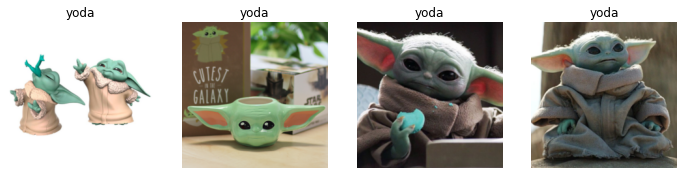

In [22]:
path = Path('/kaggle/working/yoda')
dls = ImageDataLoaders.from_folder(path, valid_pct=0.5, batch_size=10, item_tfms=Resize(224))
dls.valid.show_batch(max_n=4, nrows=1)

#### 4.2 For the model building <a id=9></a>

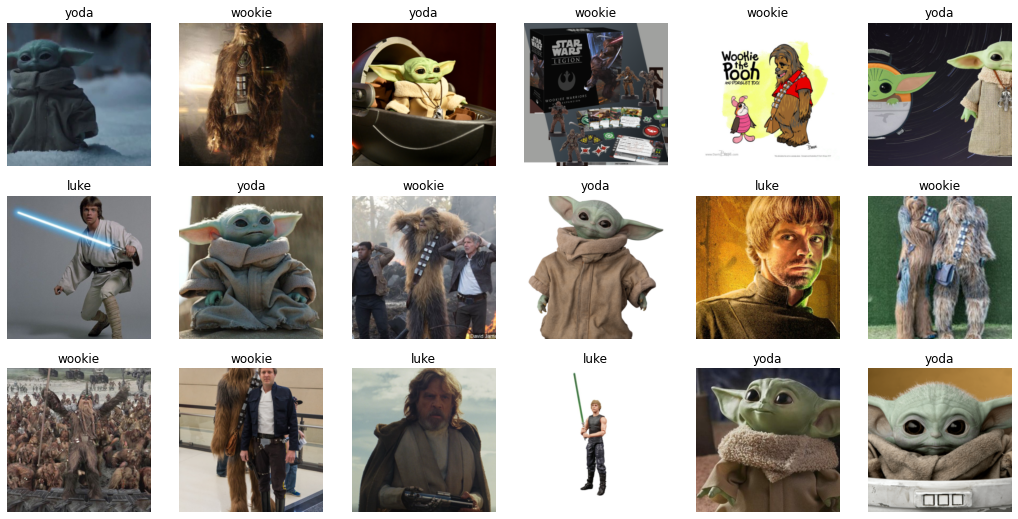

In [23]:
# DataBlock is a FastAI API to fully customize very stage of the creating of the DataLoader
characters = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

# Creating the dataloader
path = Path('/kaggle/working')
dls = characters.dataloaders(path)

# checking the images
dls.valid.show_batch(max_n=18, nrows=3)

### 5. Model Building <a id=10></a>

[back to top](#100)

#### 5.1 Training <a id=11></a>

In [24]:
# instantiating the learner for training using resnet18 and running it for 4 epochs
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.834176,2.258008,0.600000,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.978312,1.446693,0.566667,00:06
1,1.585535,0.461595,0.133333,00:05
2,1.268723,0.311160,0.066667,00:05
3,1.044068,0.287985,0.066667,00:05


#### 5.2 Prediction <a id=12></a>

In [25]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [26]:
def helper():
    img = PILImage.create(uploader.data[0])
    img.show()
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred = widgets.Label()
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    print(lbl_pred)

Label(value='Prediction: yoda; Probability: 0.9999')


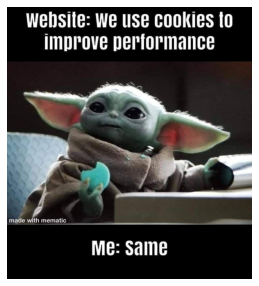

In [27]:
helper()

Label(value='Prediction: luke; Probability: 0.9567')


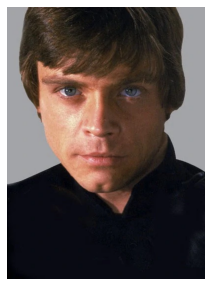

In [28]:
helper()

Label(value='Prediction: wookie; Probability: 0.9970')


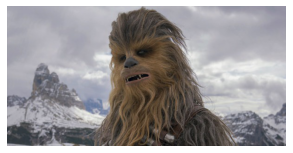

In [29]:
helper()

<div class="alert alert-warning">
<div>
    <span style="color:black">
        <center><strong>If you liked the notebook, please drop a upvote. Thank you.✅</strong></center>
    </span>
</div>
<br>
<center>
<img src = "https://media4.giphy.com/media/dnIsXwv78BC4U/giphy.gif?cid=ecf05e475908b0cewar0tc5m5saw46hi38rw59v9gcsr2cfw&rid=giphy.gif&ct=g" />
</center>
    
</div>

Check out my other notebooks here:
1. https://www.kaggle.com/namanmanchanda/cat-vs-dog-classifier-10-lines-of-code-fast-ai
2. https://www.kaggle.com/namanmanchanda/titanic-eda
3. https://www.kaggle.com/namanmanchanda/pima-indian-diabetes-eda-and-prediction